In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pprint
%matplotlib inline

import os
print(os.listdir("../input"))

['Colo - Copy (2).csv', 'Colo.csv', 'Precption(2).csv', 'Precption.csv']


In [63]:
df = pd.read_csv('../input/Colo - Copy (2).csv')

In [64]:
df

,Date,Precip MM
0,1/1/2009,0
1,2/1/2009,0
2,3/1/2009,0
3,4/1/2009,0
4,5/1/2009,0
...,...,...
4012,27/12/2019,0
4013,28/12/2019,0
4014,29/12/2019,0
4015,30/12/2019,0


In [65]:
df.Date=pd.to_datetime(df.Date)
df=df.set_index('Date')

In [66]:
df

,Precip MM
Date,
2009-01-01,0
2009-02-01,0
2009-03-01,0
2009-04-01,0
2009-05-01,0
...,...
2019-12-27,0
2019-12-28,0
2019-12-29,0


In [67]:
TestData = df.tail(365)

Training_Set = df.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [68]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (3957, 1)
Test Set Shape  (365, 1)


# Training 

In [69]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [70]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):
   
    # X_Train 0-59
    X_Train.append(Train[i-60:i])
   
    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(3897, 60, 1)
(3897, 1)


In [71]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(3897, 60, 1)

In [72]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [73]:
regressor.summary()
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 150)           91200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 150)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 150)           180600    
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 150)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 150)           180600    
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 150)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 150)              

In [74]:
regressor.fit(X_Train, Y_Train, epochs = 100, batch_size = 6)

Epoch 1/100
3897/3897 [==============================] - 138s 35ms/step - loss: 0.0049
Epoch 2/100
3897/3897 [==============================] - 140s 36ms/step - loss: 0.0041
Epoch 3/100
3897/3897 [==============================] - 141s 36ms/step - loss: 0.0038
Epoch 4/100
3897/3897 [==============================] - 142s 37ms/step - loss: 0.0036
Epoch 5/100
3897/3897 [==============================] - 142s 36ms/step - loss: 0.0037
Epoch 6/100
3897/3897 [==============================] - 142s 37ms/step - loss: 0.0035
Epoch 7/100
3897/3897 [==============================] - 143s 37ms/step - loss: 0.0035
Epoch 8/100
3897/3897 [==============================] - 143s 37ms/step - loss: 0.0034
Epoch 9/100
3897/3897 [==============================] - 143s 37ms/step - loss: 0.0034
Epoch 10/100
3897/3897 [==============================] - 142s 36ms/step - loss: 0.0037
Epoch 11/100
3897/3897 [==============================] - 141s 36ms/step - loss: 0.0035
Epoch 12/100
3897/3897 [=================

3897/3897 [==============================] - 143s 37ms/step - loss: 0.0019
Epoch 95/100
3897/3897 [==============================] - 142s 36ms/step - loss: 0.0023
Epoch 96/100
3897/3897 [==============================] - 142s 36ms/step - loss: 0.0020
Epoch 97/100
3897/3897 [==============================] - 143s 37ms/step - loss: 0.0022
Epoch 98/100
3897/3897 [==============================] - 143s 37ms/step - loss: 0.0020
Epoch 99/100
3897/3897 [==============================] - 143s 37ms/step - loss: 0.0019
Epoch 100/100
3897/3897 [==============================] - 143s 37ms/step - loss: 0.0019


In [75]:
TestData

,Precip MM
Date,
2019-01-01,0
2019-02-01,0
2019-03-01,0
2019-04-01,0
2019-05-01,0
...,...
2019-12-27,0
2019-12-28,0
2019-12-29,0


In [76]:
TestData.shape

(365, 1)

In [77]:
df.shape

(4017, 1)

In [78]:
Df_Total = pd.concat((df[["Precip MM"]], TestData[["Precip MM"]]), axis=0)

In [79]:
Df_Total.shape

(4382, 1)

In [80]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(425, 1)

In [97]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 425):
    X_test.append(inputs[i-60:i])
    
#for a in range(60, 425):
    #X_test.append(input[a-60:a])

   
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_Precip = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_Precip = sc.inverse_transform(predicted_Precip)

In [98]:
True_Precip = TestData["Precip MM"].to_list()
Predicted_Precip  = predicted_Precip
dates = TestData.index.to_list()

In [99]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TruePrecip": True_Precip,
    "PredictedPrecip":[x[0] for x in Predicted_Precip ]
})

In [100]:
Machine_Df

,Date,TruePrecip,PredictedPrecip
0,2019-01-01,0,9.962876
1,2019-02-01,0,3.047402
2,2019-03-01,0,6.614010
3,2019-04-01,0,3.927015
4,2019-05-01,0,3.972919
...,...,...,...
360,2019-12-27,0,5.930830
361,2019-12-28,0,9.493395
362,2019-12-29,0,9.187423
363,2019-12-30,0,10.187051


In [101]:
Machine_Df.to_csv("../input/Precption(2).csv")

No handles with labels found to put in legend.


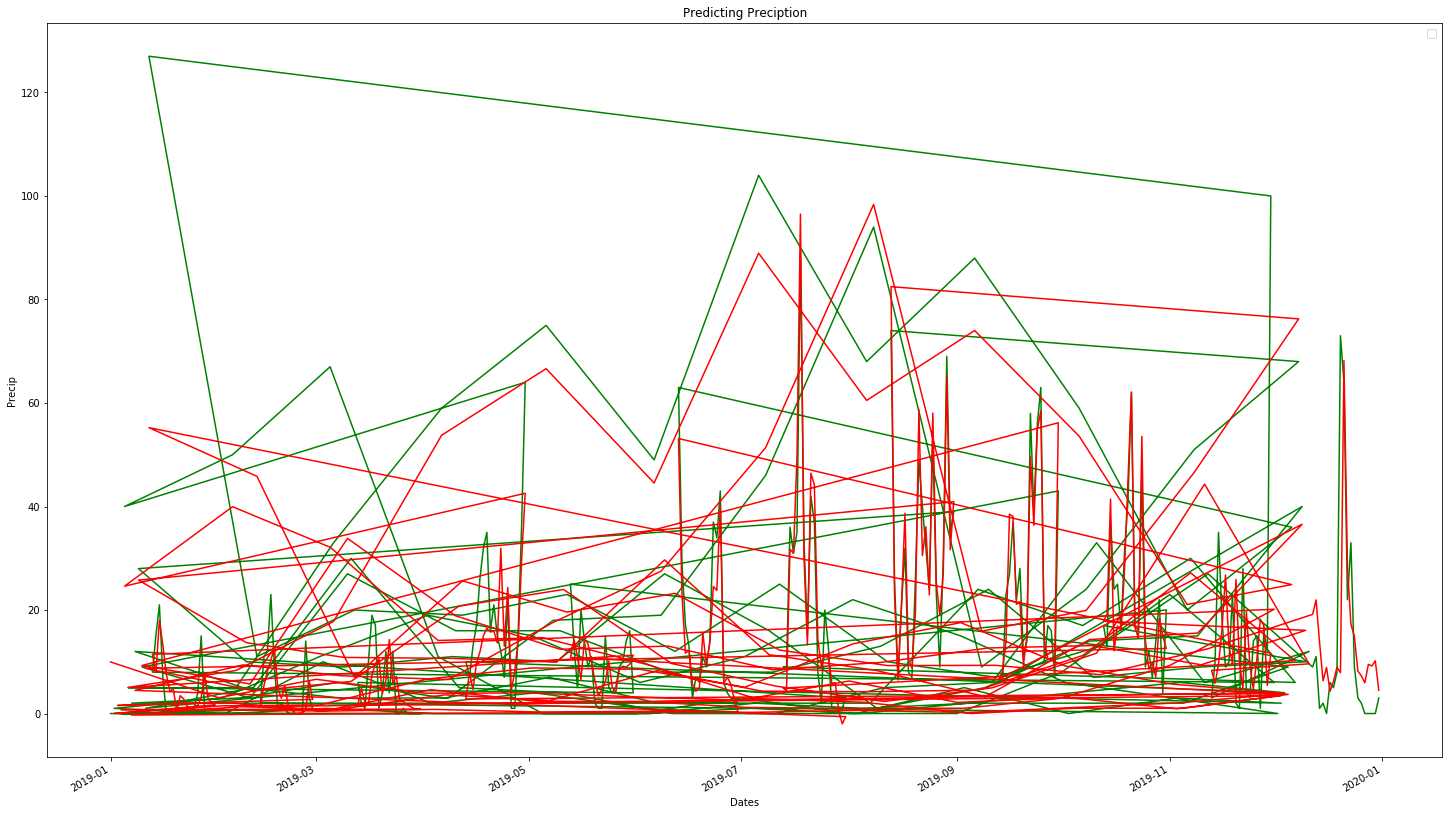

In [143]:
fig = plt.figure(figsize=(25,15))

axl = fig.add_subplot(111)

x = dates
y = True_Precip

y1 = Predicted_Precip

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")

plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel('Precip')

plt.title("Predicting Preciption")
plt.legend(fontsize='large')


In [148]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,366)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [149]:
future_dates.tail(365)

,Precip MM
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
...,...
2020-12-26,NaN
2020-12-27,NaN
2020-12-28,NaN
2020-12-29,NaN


In [257]:
df.shape

(4017, 1)

In [286]:
Training_Set = df

In [287]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [288]:
Train.shape

(4017, 1)

In [289]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):
   
    # X_Train 0-59
    X_Train.append(Train[i-60:i])
   
    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(3957, 60, 1)
(3957, 1)


In [290]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(3957, 60, 1)

In [291]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True,input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [292]:
regressor.summary()
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 60, 150)           91200     
_________________________________________________________________
dropout_44 (Dropout)         (None, 60, 150)           0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 60, 150)           180600    
_________________________________________________________________
dropout_45 (Dropout)         (None, 60, 150)           0         
_________________________________________________________________
lstm_56 (LSTM)               (None, 60, 150)           180600    
_________________________________________________________________
dropout_46 (Dropout)         (None, 60, 150)           0         
_________________________________________________________________
lstm_57 (LSTM)               (None, 150)             

In [298]:
regressor.fit(X_Train,Y_Train, epochs = 5, batch_size = 6)

Epoch 1/5
3957/3957 [==============================] - 145s 37ms/step - loss: 0.0029
Epoch 2/5
3957/3957 [==============================] - 147s 37ms/step - loss: 0.0029
Epoch 3/5
3957/3957 [==============================] - 146s 37ms/step - loss: 0.0028
Epoch 4/5
3957/3957 [==============================] - 149s 38ms/step - loss: 0.0028
Epoch 5/5
3957/3957 [==============================] - 148s 37ms/step - loss: 0.0028


In [299]:
future_dates.shape

(365, 1)

In [300]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 425):
    X_test.append(inputs[i-60:i])
       
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_Precip = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_Precip = sc.inverse_transform(predicted_Precip)

In [301]:
True_Precip = 0
Predicted_Precip  = predicted_Precip
dates = TestData.index.to_list()

In [302]:
#df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['Predictions'])
Machine_Df2 = pd.DataFrame(data={
    "Date":future_dates.index.to_list(),
    "TruePrecip": True_Precip,
    "PredictedPrecip":[x[0] for x in predicted_Precip]
})


df_proj= pd.concat([Machine_Df,Machine_Df2],axis=1)

In [303]:
df_proj

,Date,TruePrecip,PredictedPrecip,Date,TruePrecip,PredictedPrecip
0,2019-01-01,0,9.962876,2020-01-01,0,8.771380
1,2019-02-01,0,3.047402,2020-01-02,0,6.126590
2,2019-03-01,0,6.614010,2020-01-03,0,5.606874
3,2019-04-01,0,3.927015,2020-01-04,0,5.002531
4,2019-05-01,0,3.972919,2020-01-05,0,4.686895
...,...,...,...,...,...,...
360,2019-12-27,0,5.930830,2020-12-26,0,5.249003
361,2019-12-28,0,9.493395,2020-12-27,0,5.301536
362,2019-12-29,0,9.187423,2020-12-28,0,5.069557
363,2019-12-30,0,10.187051,2020-12-29,0,6.113064


In [304]:
df_proj.to_csv("../input/Precption(4).csv")

In [306]:
regressor.save('../input/my_model') 

In [ ]:
regressor.save('../input/my_model.h5') 